<a href="https://colab.research.google.com/github/Smash08/Detec-odeFraudeCart-oDeCredito/blob/main/Detec%C3%A7%C3%A3o_de_Fraudes_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DETECÇÃO DE FRAUDES EM CARTÃO DE CRÉDITO

Sabe-se que uma das principais preocupações das  instituições financeiras - Bancos e *Fintechs*, são as fraudes nos Cartões de Crédito. No Brasil, por sinal,  país que lidera o ranking, só de Setembro de 2017 a 2018 as fraudes atingiram cerca de 8 milhões de Brasileiros, segundo o [SPC Brasil](https://www.iq.com.br/noticias/fraudes-financeiras).

No último ano - 2020, o Brasil acumulou 45% dos casos de fraudes de Cartão de Crédito de todo mundo, uma situação preocupante e de plena necessidade de atentar-se a mesma.

Assim, a sua não detecção gera prejuízo não só para o consumidor, como também as instituições financeiras, outro a fator importante são as vezes em que houve uma tentativa de realizar uma compra, entretanto sendo inviabilizada por conta do bloqueio do cartão preventivamente - acarretando em uma situação constrangedora.

Dito isso, um algoritmo de machine learning pode auxiliar na detecção de fraudes, e por fim, gerando uma economia de milhões de Reais. Visto isso, objetivo desse projeto é elaborar um algoritmo com intuito de evitar transações fraudulentas.




##IMPORTANDO DADOS

Os dados que serão utilizados, neste projeto, foram disponibilizados por algumas empresas européias de cartão de crédito. Neste conjunto de dados encontram-se as operações financeiras ocorridas durante dois dias, nas quais,  492 fraudesforam classificadas em meio a quase 290 mil transações.

Visto isto, fica notorio que, o conjunto de dados é extremamente desbalanceado, poiis as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em menor número ou igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

##INFORMAÇÕES SOBRE ATRIBUTOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler



/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
sns.set_style('dark')

df = pd.read_csv("https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1")

##Análise Exploratória

* A variável alvo está representada na coluna `Class`, onde:
    * **0:** Transação normal; e
    * **1:** Transação fraudulenta

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0




A seguir iremos ver o resumo estatistico do dataframe, em relação a coluna `Amount`,  como esperado a maioria das transações são valores menores, o que é esperado.

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Na verificação de dados ausentes não obtemos nenhum valor, assim não é necessário efetuar limpeza dos dados

In [5]:
#verificar dados ausentes
df.isnull().sum().max()

0

Agora iremos verificar a coluna `Class`, no intuito de averiguar como os dados estão sendo distribuidos

In [6]:
#balanceamento de dados
print(df.Class.value_counts())
print(f"\nFraudes representam {(df[df.Class == 1].shape[0]/ df.shape[0])*100:.2f}%")




0    284315
1       492
Name: Class, dtype: int64

Fraudes representam 0.17%


Em uma simples consulta, percebemos que as fraudes representam apenas 0.17% das transações, o que necessita de um balanceamento, para melhorar visualização, iremos plotar um Gráfico de Barras.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


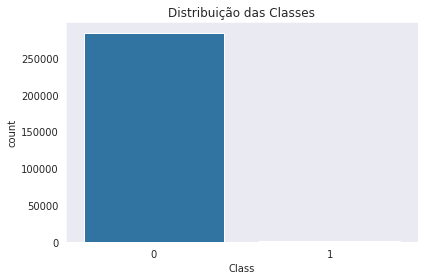

In [7]:
fig, ax = plt.subplots()

sns.countplot('Class', data=df, ax=ax);

ax.set_title('Distribuição das Classes')
plt.tight_layout();

No Gráfico de barras, ficou visivel o quão gritante é o desbalanceamento

Plotou-se também dois gráficos a fim de comparar as distribuições das 2 classes ao longo da dimensão tempo (`Time`). No entanto, não foi identificada nenhum informação a partir das distribuições de frequência abaixo.

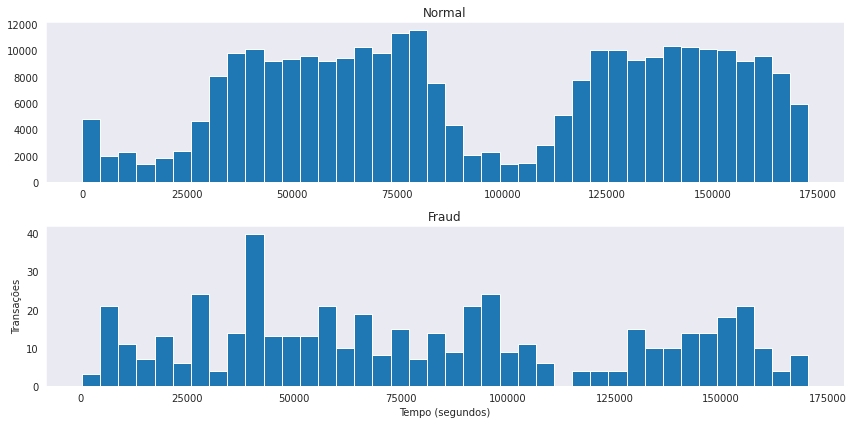

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

num_bins = 40
ax[0].hist(df.Time[df.Class==0], bins=num_bins)
ax[0].set_title('Normal')

ax[1].hist(df.Time[df.Class==1], bins=num_bins)
ax[1].set_title('Fraud')

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

Seguindo a análise exploratória, plotou-se os *boxplots* para ver se há alguma diferença no padrão transações em relação à dimensão `Amount`.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


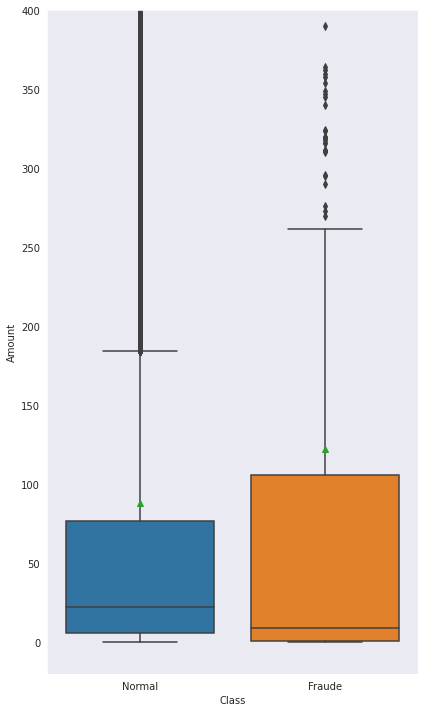

In [9]:
fig, ax = plt.subplots(figsize=(6,10))

sns.boxplot(df.Class, df.Amount,showmeans=True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])
plt.tight_layout();

De uma maneira geral, percebe-se uma distribuição diferente para as duas classes, o que provavelmente irá contribuir negativamente para o treinamento do modelo de *machine learning*.

A seguir, as informações estatísticas para df.Class == 1 mostram que a sua média exata está em 122.21 e a mediana em 9.25.

In [10]:
df[(df.Class == 1)]['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

O gráfico de densidade é muito útil para compararmos as distribuições de cada variável para cada classe e ver quais as mais importantes para detecção de anomalias.

O que se procura nesse tipo de visualização são distribuições que diferem uma da outra, permitindo identificar fraudes mais facilmente. Note como as variáveis `V3`, `V4`, `V10` e `V11`, como elas são bem distintas.

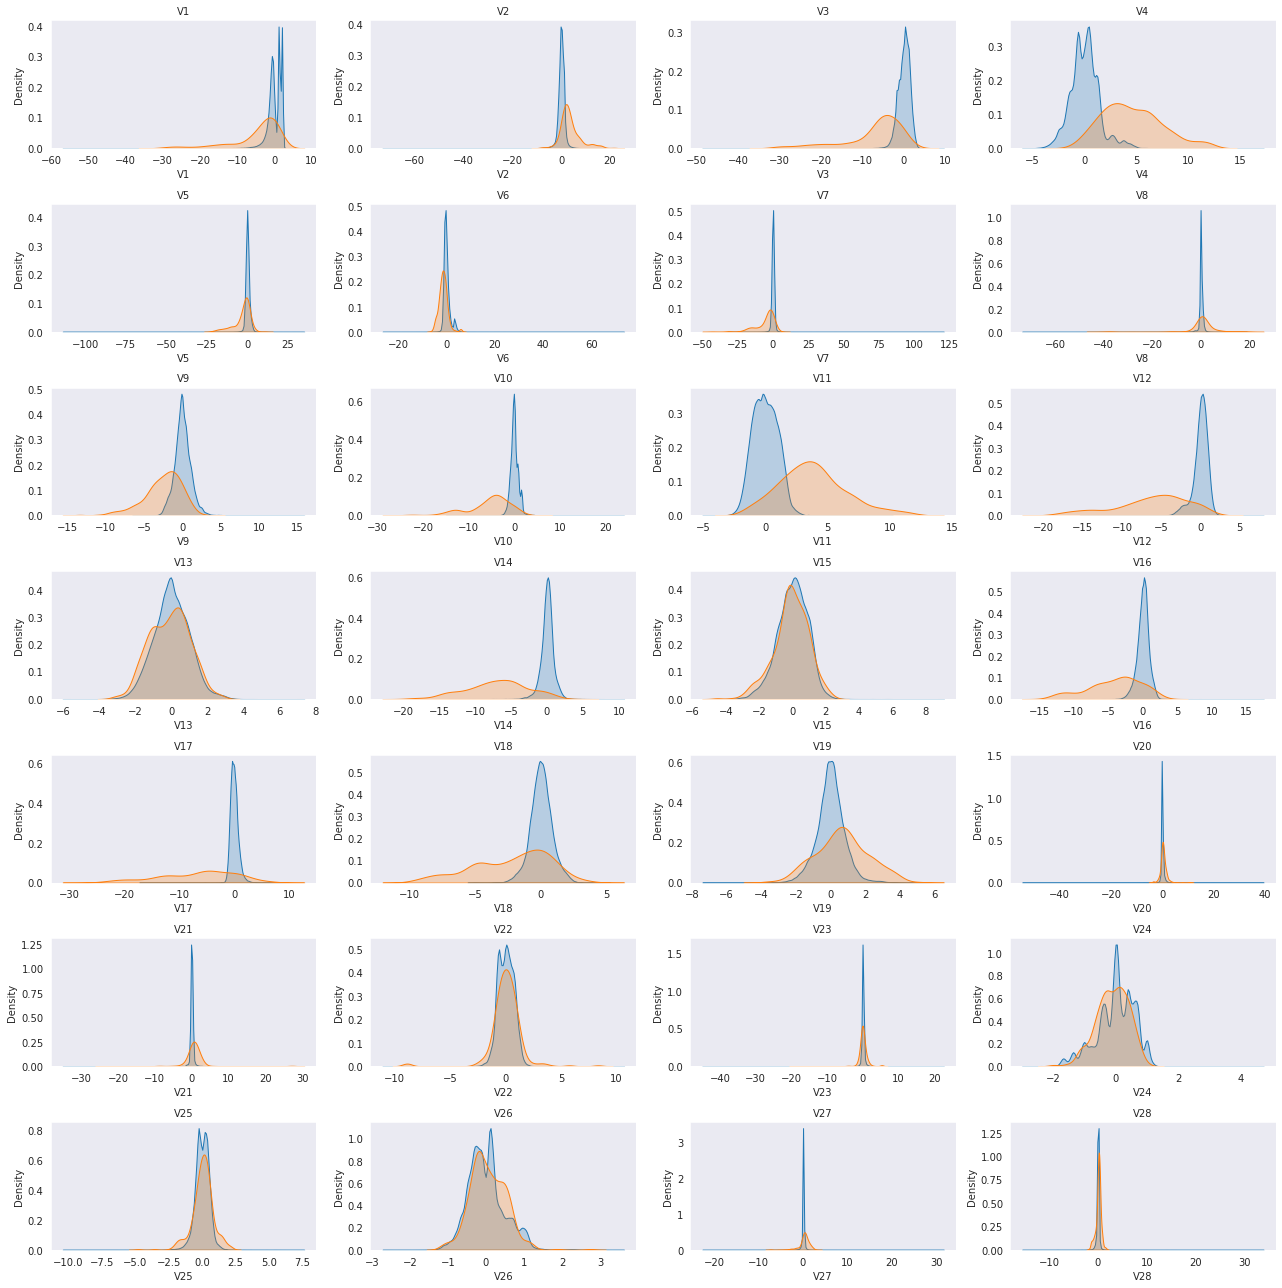

In [12]:
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax =plt.subplots(nrows=7, ncols=4, figsize =(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx= 0
for col in column_names:
  idx +=1
  plt.subplot(7, 4, idx)
  sns.kdeplot(df_class_0[col], label='Class 0', shade=True)
  sns.kdeplot(df_class_1[col], label='Class 1', shade=True)
  plt.title(col, fontsize=10)

plt.tight_layout()






##Resumo do que foi compreendido:
1. Os dados estão desbalanceados
2. Não há dados ausentes
3. o PCA é sensível à escala das variáveis, assume-se a premissa que as *features* originais foram padronizadas.
4. As colunas `Time` e `Amount` não estão normalizadas.

##Agora vamos preparar os dados

Padronizar as features Time e Amount, que estão em outra ordem de grandeza.

Dividir entre dados de treino e teste

Balancear os dados a fim de evitar uma baixa performance para a classe 1 e overfitting.

**Padronizar `Time` e `Amount`**

Para esta etapa, uma vez que a coluna `Amount` possui *outliers* será usada a padronização por meio da classe `StandardScaler`.

In [13]:
# padronizar as colunas Time e Amount
df_clean = df.copy()


std_scaler= StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1,1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1,1))

df_clean.drop(['Time','Amount'],axis=1, inplace=True)

# ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


**Dividir entre conjuntos de treino e teste**

Antes de realizar o balanceamento, é necessário splitar os dados já existentes entre treino e teste. Pois, se assim não for feito não haverá parâmetros para conferir se o balanceamento foi adequado.


In [14]:
x = df_clean.drop('Class', axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, shuffle=True)

**Balanceamento dos dados**


1    369
0    369
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


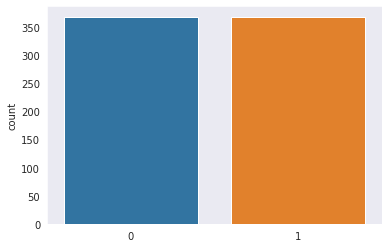

In [15]:
# usar técnica under-sampling
rus= RandomUnderSampler()
x_rus, y_rus = rus.fit_sample(x_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_rus)


Com os dados balanceados, iremos ver, novamente, a matriz de correlação e identificar quais variáveis estão mais fortemente relacionadas com as outras.

Observe como anteriormente - irei plota-lo de forma completa agora, sem o balanceamento de dados, a matriz de correlação não trazia nenhuma informação relevante. Entretanto, ela traz muito mais informações após um correto balanceamento.

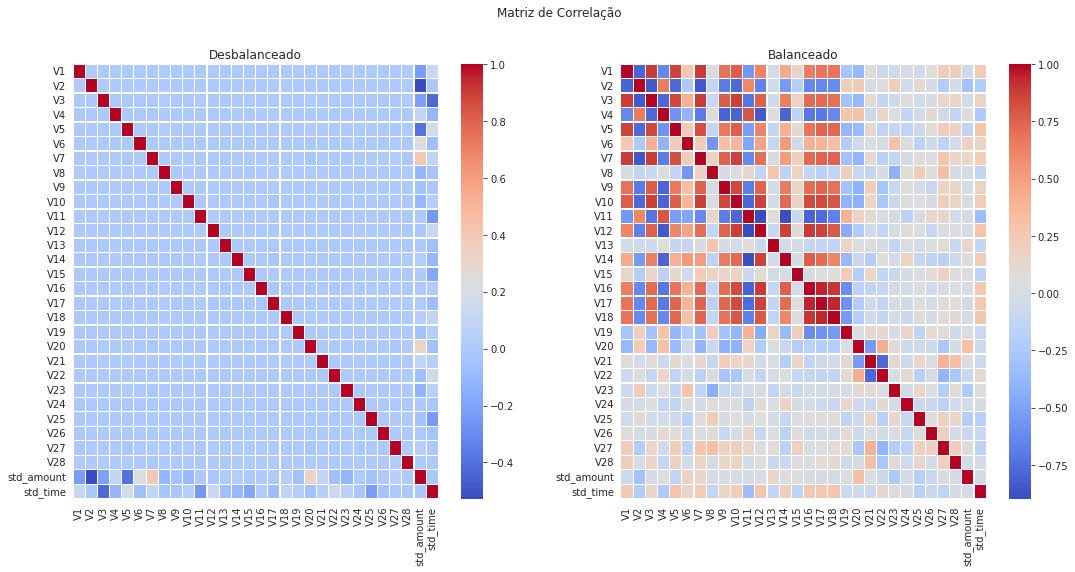

In [18]:

corr =  x_train.corr()
corr_rus = pd.DataFrame(x_rus).corr()

fig, ax = plt.subplots(nrows=1, ncols =2 , figsize = (18,8))
fig.suptitle('Matriz de Correlação')


sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()


##MACHINE LEARNING

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from warnings import simplefilter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

Separando as features

In [47]:
dataX_rus= pd.DataFrame(x_rus)
dataY_rus = pd.DataFrame(y_rus)
clf =RandomForestClassifier(n_estimators=100, random_state=7)
clf.fit(dataX_rus, dataY_rus)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [55]:
feature_imp = pd.Series(clf.feature_importances_,index=dataX_rus.columns).sort_values(ascending=False)
feature_imp

9     0.142394
13    0.138401
11    0.126393
3     0.107076
10    0.083100
16    0.072688
2     0.052251
15    0.041521
1     0.029756
17    0.020210
6     0.018169
28    0.015387
20    0.014035
18    0.013162
14    0.013119
19    0.012995
4     0.010497
8     0.010036
0     0.008275
26    0.007667
7     0.007398
24    0.007101
22    0.007009
25    0.006834
5     0.006635
29    0.006542
21    0.005467
23    0.005407
12    0.005361
27    0.005116
dtype: float64

In [58]:
features_selected = []
for feature,importance in feature_imp.iteritems():
    if importance > 0.03:
        print(f'{feature}: {round(importance * 100)}%')
        features_selected.append(feature)

9: 14%
13: 14%
11: 13%
3: 11%
10: 8%
16: 7%
2: 5%
15: 4%


In [60]:
previsores = dataX_rus[features_selected]
classe = dataY_rus

In [67]:
pipelines = []

pipelines.append(('Scaled-LR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('Scaled-KNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('Scaled-CART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('Scaled-NB', Pipeline([('Scaler', StandardScaler()), ('NB',GaussianNB())])))
pipelines.append(('Scaled-RF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestClassifier())])))
pipelines.append(('Scaled-XG', Pipeline([('Scaler', StandardScaler()), ('XGB', XGBClassifier())])))

resultados =[]
nomes= []
add_model = [ ]
#Percorrendo cada um dos modelos

for nome, modelo  in pipelines:
    kfold= StratifiedKFold(n_splits =10, shuffle=True, random_state=7)
    cross_val_result = model_selection.cross_val_score(modelo,
                                                       previsores,
                                                       classe,
                                                       cv=kfold,
                                                       scoring='accuracy')
    resultados.append(cross_val_result)
    nomes.append(nome)
    texto ="%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    add_model.append(texto)
    print(texto)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

['Scaled-LR: 0.938986 (0.022943)']
['Scaled-LR: 0.938986 (0.022943)', 'Scaled-KNN: 0.936283 (0.025051)']


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

['Scaled-LR: 0.938986 (0.022943)', 'Scaled-KNN: 0.936283 (0.025051)', 'Scaled-CART: 0.901074 (0.030281)']
['Scaled-LR: 0.938986 (0.022943)', 'Scaled-KNN: 0.936283 (0.025051)', 'Scaled-CART: 0.901074 (0.030281)', 'Scaled-NB: 0.922714 (0.024487)']


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

['Scaled-LR: 0.938986 (0.022943)', 'Scaled-KNN: 0.936283 (0.025051)', 'Scaled-CART: 0.901074 (0.030281)', 'Scaled-NB: 0.922714 (0.024487)', 'Scaled-RF: 0.932247 (0.016025)']


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

['Scaled-LR: 0.938986 (0.022943)', 'Scaled-KNN: 0.936283 (0.025051)', 'Scaled-CART: 0.901074 (0.030281)', 'Scaled-NB: 0.922714 (0.024487)', 'Scaled-RF: 0.932247 (0.016025)', 'Scaled-XG: 0.940355 (0.019486)']


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [72]:
for model in add_model:
  print(model)

Scaled-LR: 0.938986 (0.022943)
Scaled-KNN: 0.936283 (0.025051)
Scaled-CART: 0.901074 (0.030281)
Scaled-NB: 0.922714 (0.024487)
Scaled-RF: 0.932247 (0.016025)
Scaled-XG: 0.940355 (0.019486)


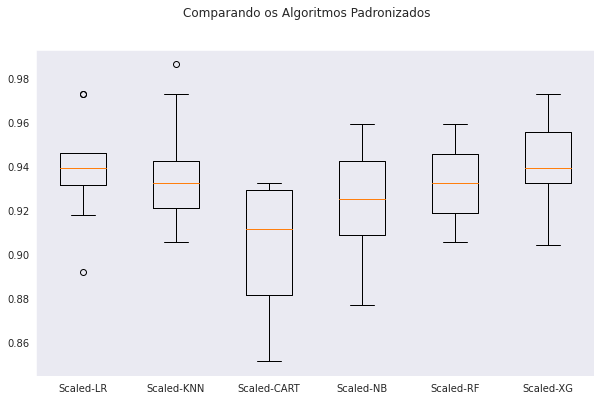

In [73]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Comparando os Algoritmos Padronizados')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

##Melhorando o modelo  RandomForest

In [74]:
# Definindo a escala
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

#Possiíveis valores de estimators
val_estimators= [20, 50, 100, 150, 200]

#Possíveis valores para o critério de divisão
val_criterion = ['gini', 'entropy']

#definindo max_depth
max_depth = list(range(1, 31))

# Definindo um dicionário que recebe as listas de parâmetros e valores
valores_grid = dict(criterion = val_criterion,
                    max_depth = max_depth,
                    n_estimators = val_estimators)

#Definindo um dicionário que recebe as litaas de parâmetros e valores
parametros_gri = dict(n_estimators = val_estimators,
                      criterion = val_criterion)

#Criando o modelo
modelo_random = RandomForestClassifier()

#Definindo K
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

#testando diferentes combinações com os parâmetros
grid = RandomizedSearchCV(estimator=modelo_random, 
                          param_distributions=parametros_gri, 
                          cv =kfold, scoring = 'accuracy')
grid.fit(previsores, classe)

#Resultado:
print("Grid Score on development set:")
means = grid.cv_results_['mean_test_score'].round(5)
stds = grid.cv_results_['std_test_score'].round(5)


for mean, std, params in zip(means, stds, grid.cv_results_['params']):
  print(f'mean:{mean} std:{std}, params:{params}')
print()
print(f'Melhor parâmetro:{grid.best_params_}, \nScore:{grid.best_score_}')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

Grid Score on development set:
mean:0.92956 std:0.02074, params:{'n_estimators': 20, 'criterion': 'gini'}
mean:0.9363 std:0.01227, params:{'n_estimators': 50, 'criterion': 'gini'}
mean:0.93902 std:0.01091, params:{'n_estimators': 100, 'criterion': 'gini'}
mean:0.94037 std:0.01381, params:{'n_estimators': 150, 'criterion': 'gini'}
mean:0.92954 std:0.01986, params:{'n_estimators': 200, 'criterion': 'gini'}
mean:0.93356 std:0.02465, params:{'n_estimators': 20, 'criterion': 'entropy'}
mean:0.92953 std:0.01991, params:{'n_estimators': 50, 'criterion': 'entropy'}
mean:0.93495 std:0.01799, params:{'n_estimators': 100, 'criterion': 'entropy'}
mean:0.93765 std:0.01515, params:{'n_estimators': 150, 'criterion': 'entropy'}
mean:0.93632 std:0.02101, params:{'n_estimators': 200, 'criterion': 'entropy'}

Melhor parâmetro:{'n_estimators': 150, 'criterion': 'gini'}, 
Score:0.940373935579415


In [89]:
# fazer as previsões em cima dos dados de teste
modelo_random = RandomForestClassifier()
modelo_random.fit(x_rus, y_rus)
y_pred = modelo_random.predict(x_test)
y_proba = modelo_random.predict_proba(x_test)
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9743    0.9869     71079
           1     0.0574    0.9024    0.1079       123

    accuracy                         0.9742     71202
   macro avg     0.5286    0.9384    0.5474     71202
weighted avg     0.9982    0.9742    0.9854     71202

Acurácia: 0.9742



##CONCLUSÃO

Conclui-se que após melhorado o RandomForest desenvolveu bem, tendo uma excelente acurácia, logo, as técnicas de Machine Learning são fundamentais para ajudar nessa batalha que são as fraudes.

